In [206]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors={'urban':'lightcoral','suburban':'lightskyblue','rural':'gold'}
# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data =pd.read_csv(city_data_to_load)
ride_data =pd.read_csv(ride_data_to_load)

city_df = pd.DataFrame(city_data)
ride_df = pd.DataFrame(ride_data)

# Combine the data into a single dataset
combo_df =pd.merge(city_df, ride_df, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

# Display the data table for preview
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


## Bubble Plot of Ride Sharing Data

In [207]:
#aggregate rides and average of fares
def summary(x):
    fields ={'Average Fare':x['fare'].mean(),
            'Total Rides': x['ride_id'].count(),
            'Number of Drivers': x['driver_count'].mean()}
    
    return pd.Series(fields)

combo_grouped_df = combo_df.groupby(['city','type']) #groupby city and type.  
summary_df =combo_grouped_df.apply(summary).reset_index(level='type') #create new df and reset index by pulling 'type' out of the index
summary_df.head()

,type,Average Fare,Total Rides,Number of Drivers
city,,,,
Amandaburgh,Urban,24.641667,18.0,12.0
Barajasview,Urban,25.332273,22.0,26.0
Barronchester,Suburban,36.422500,16.0,11.0
Bethanyland,Suburban,32.956111,18.0,22.0
Bradshawfurt,Rural,40.064000,10.0,7.0


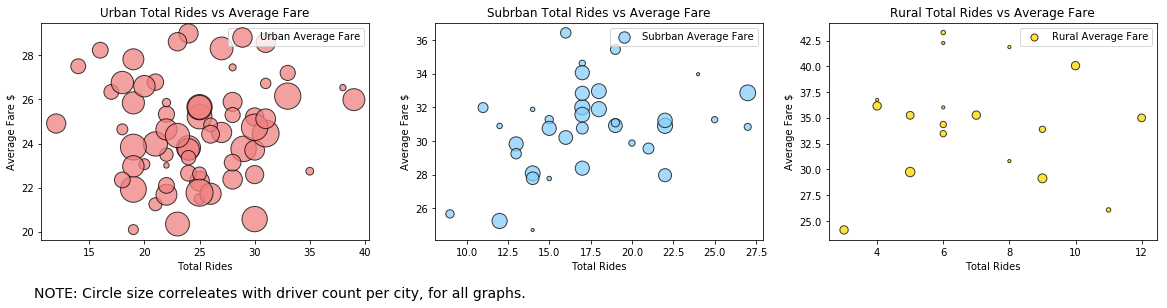

In [208]:
# Obtain the x and y coordinates for each of the three city types
# x_axis = summary_df['Total Rides']
# y_axis = summary_df['Average Fare']

urban_df=summary_df.loc[summary_df['type'] == 'Urban'] #get only the urban rows
suburban_df=summary_df.loc[summary_df['type'] == 'Suburban'] #get only the suburban rows
rural_df=summary_df.loc[summary_df['type'] == 'Rural']#get only hte rural rows

#Get X and Y axis for each type
urban_x_axis = urban_df['Total Rides'] 
urban_y_axis = urban_df['Average Fare']

suburban_x_axis = suburban_df['Total Rides']
suburban_y_axis = suburban_df['Average Fare']

rural_x_axis = rural_df['Total Rides']
rural_y_axis = rural_df['Average Fare']

#Build the scatter plots for each city types
fig=plt.figure(figsize = (20,4)) #creates a figure

#creates 3 subplots within figure
ax1=fig.add_subplot(1,3,1)  #(1,3,1) means (rows, columns, plot #)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

#create 3 plots and add chart info
ax1.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors=colors['urban'], edgecolors="black",
            s=urban_df['Number of Drivers']*10, alpha=0.75)
ax1.title.set_text("Urban Total Rides vs Average Fare")
ax1.set_xlabel("Total Rides")
ax1.set_ylabel("Average Fare $")
ax1.legend(['Urban Average Fare'],loc ='best')#loc best does not seem to be working.  Uknown reason.
ax1.text(10, 17, 'NOTE: Circle size correleates with driver count per city, for all graphs.', fontsize=14)

ax2.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors=colors['suburban'], edgecolors="black",
            s=suburban_df['Number of Drivers']*10, alpha=0.75)
ax2.title.set_text("Subrban Total Rides vs Average Fare")
ax2.set_xlabel("Total Rides")
ax2.set_ylabel("Average Fare $")
ax2.legend(['Subrban Average Fare'],loc ="best")#loc best does not seem to be working.  Uknown reason.


ax3.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors=colors['rural'], edgecolors="black",
            s=rural_df['Number of Drivers']*10, alpha=0.75)
ax3.title.set_text("Rural Total Rides vs Average Fare")
ax3.set_xlabel("Total Rides")
ax3.set_ylabel("Average Fare $")
ax3.legend(['Rural Average Fare'], loc='best')#loc best does not seem to be working.  Uknown reason.

plt.savefig("Images/type_sep.png")# saves figure to separate file
plt.show()

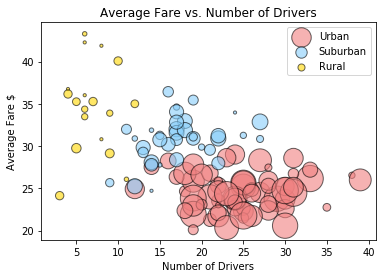

In [209]:
#Build a combined bubble plot

fig = plt.figure()#creates figure
ax= fig.add_subplot(1,1,1) #creates subplot

#add 3 sets of data
ax.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors=colors['urban'], edgecolors="black",
            s=urban_df['Number of Drivers']*10, alpha=.6, label ='Urban',linewidths=None)

ax.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors=colors['suburban'], edgecolors="black",
            s=suburban_df['Number of Drivers']*10, alpha=.6,label='Suburban',linewidths=None)

ax.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors=colors['rural'], edgecolors='black', #black looks best for edgecolors
             s=rural_df['Number of Drivers']*10, alpha=.6, label ='Rural',linewidths=None)
#add chart info
ax.set_title('Average Fare vs. Number of Drivers')
ax.set_xlabel('Number of Drivers')
ax.set_ylabel('Average Fare $')
ax.legend(loc='best')

plt.savefig("Images/all_types.png")#save figure
plt.show()


In [210]:
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


In [211]:
def pie(x):
    fields ={'Sum of Fare':x['fare'].sum(),
            'Total Rides': x['ride_id'].count()}
    
    return pd.Series(fields)

pie_df = combo_df.groupby(['type']).apply(pie).reset_index()
pie_df


,type,Sum of Fare,Total Rides
0,Rural,4327.93,125.0
1,Suburban,19356.33,625.0
2,Urban,39854.38,1625.0


In [212]:
# #troubleshooting and help chart
# new_df=combo_df.groupby('type') #group the merged df by type
# fare_sum=new_df['fare'].sum().reset_index() #sum fares and reset index so you can use 'type' as a field.

# plt.pie(fare_sum['fare'], labels=fare_sum['type']) #create a pie chart using sum of 'fare' and labels from 'type'
# plt.show()

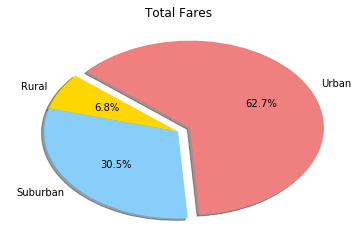

In [213]:
explode=(0,0,.1)#explode out Rural to make more legible

#pie chart of Total Fares
plt.pie(pie_df['Sum of Fare'], explode =explode, labels=pie_df['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=.6)

plt.title('Total Fares')
plt.savefig("Images/pie_fares.png")
plt.show()

## Total Rides by City Type

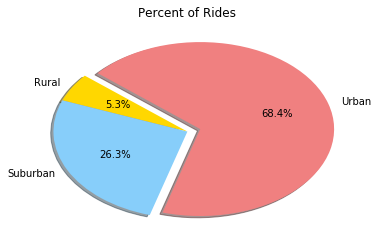

In [214]:
explode2=(0,0,.1)
#pie chart of percent of rides
plt.pie(pie_df['Total Rides'], explode =explode2, labels=pie_df['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Percent of Rides')
plt.savefig("Images/pie_rides.png")
plt.show()


In [215]:
def pie2(x):
    fields ={'Sum of Fare':x['fare'].sum(),
            'Total Rides': x['ride_id'].count()}
    
    return pd.Series(fields)

pie_df2=combo_df.groupby(['city','driver_count','type']).apply(pie2).reset_index()

def pie3(x):
    fields ={'Sum of Fare':x['Sum of Fare'].sum(),
            'Total Rides': x['Total Rides'].sum(),
            'Total Drivers':x['driver_count'].sum(),
            'Avg Fare/Driver':x['Sum of Fare'].sum()/x['driver_count'].sum(),
            'Avg Fare/Ride':x['Sum of Fare'].sum()/x['Total Rides'].sum()}
    
    return pd.Series(fields)


pie_df3= pie_df2.groupby(['type']).apply(pie3).reset_index()
pie_df3.head()

,type,Sum of Fare,Total Rides,Total Drivers,Avg Fare/Driver,Avg Fare/Ride
0,Rural,4327.93,125.0,78.0,55.486282,34.623440
1,Suburban,19356.33,625.0,490.0,39.502714,30.970128
2,Urban,39854.38,1625.0,2405.0,16.571468,24.525772


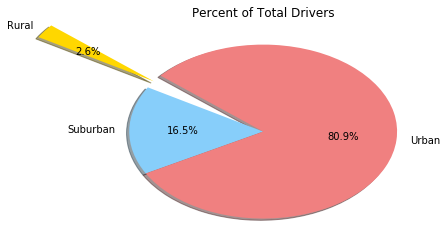

In [216]:
explode=(1,0,0)#explode out Rural to make more legible

#pie chart of Percent of Drivers
plt.pie(pie_df3['Total Drivers'], explode =explode, labels=pie_df3['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=.6)

plt.title('Percent of Total Drivers')
plt.savefig("Images/pie_drivers.png")
plt.show()

## Total Drivers by City Type

## 3 Observabfle Trends
Observation 1: The Average fare for rural is the most, followed by surburban and finally urban.

Observation 2: 



